In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

The data set was generated by a Monte Carlo program, Corsika, described in:

    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,

    Forschungszentrum Karlsruhe FZKA 6019 (1998).


In [2]:
cols = ['flength','fwidth','fsize','fconc','fconc1','fasym','fm3long','fm3trans','falpha','fdist','class']
df = pd.read_csv('magic04.data',names=cols)
df.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()  # para ver quantos tipos de classes tem

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == 'g').astype(int)  # converte as classes em números

In [5]:
df.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


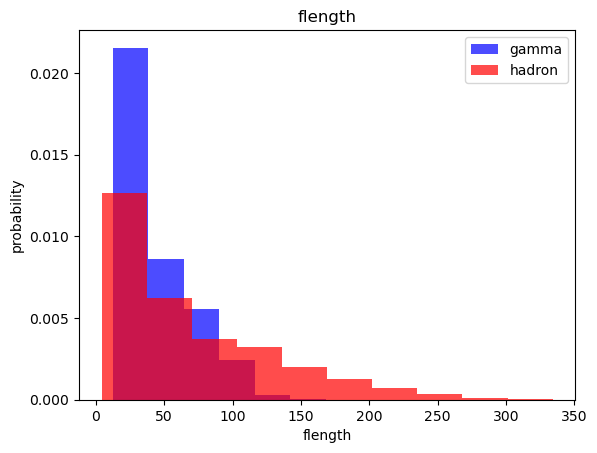

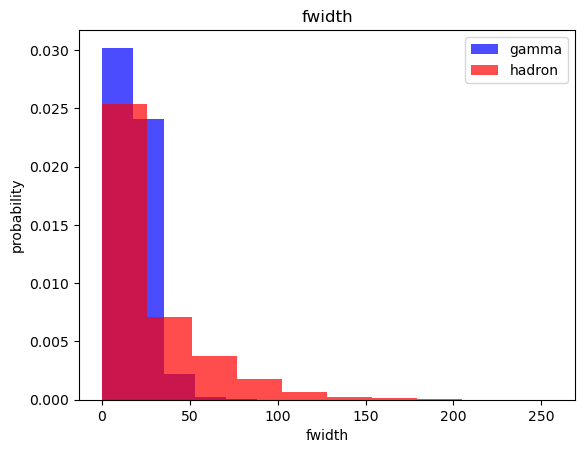

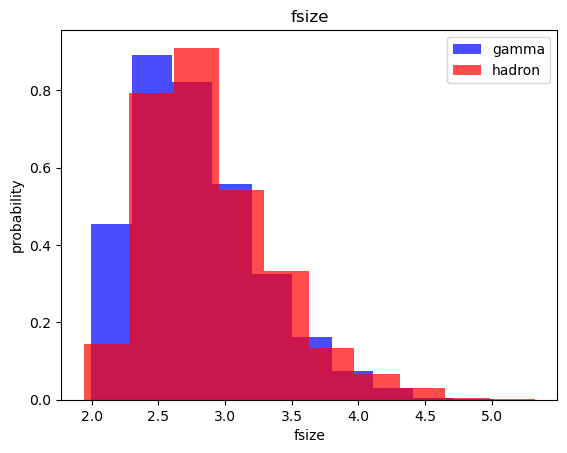

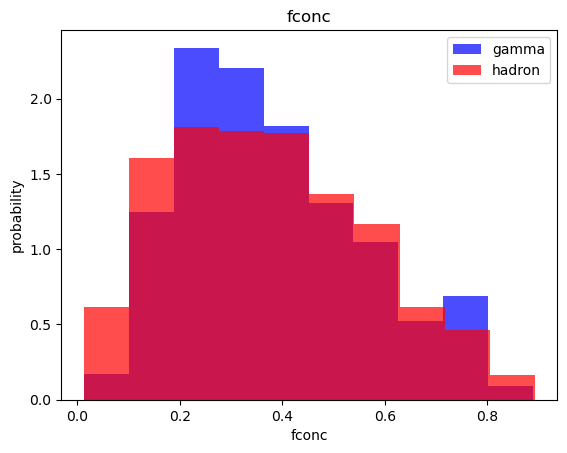

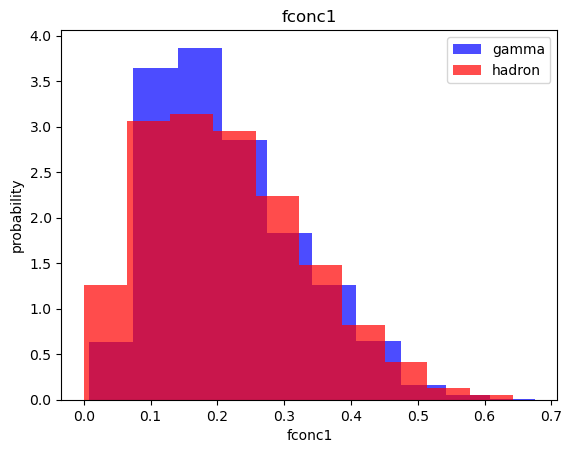

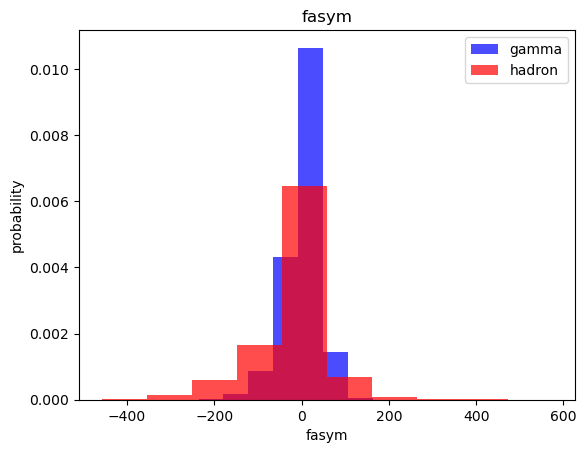

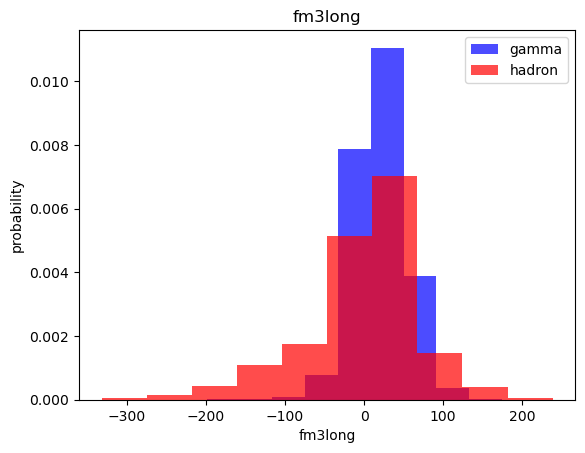

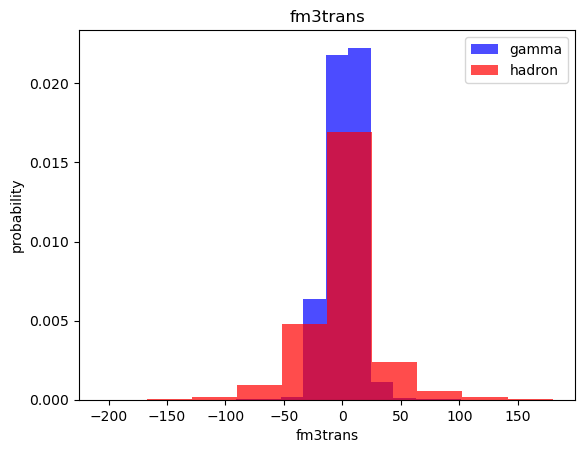

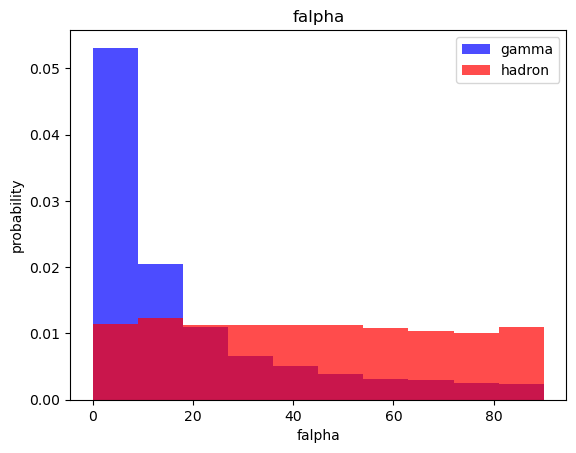

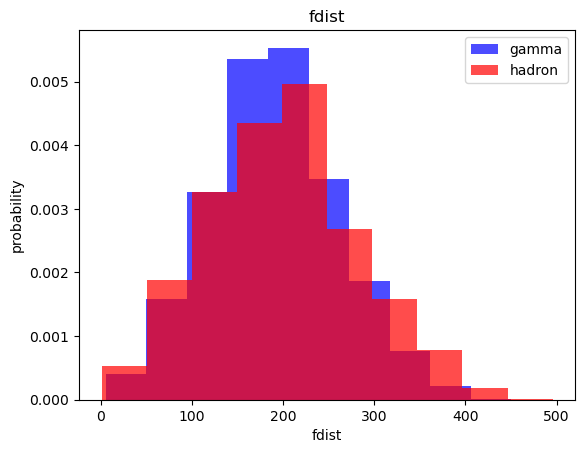

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label],color="blue", label="gamma",alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label],color="red", label="hadron",alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Treinamento, validação, teste de conjunto de dados

In [16]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [17]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1) )))
    return data, X,y

In [9]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # gamma

7369
4043


In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [11]:
len(y_train)

14738

In [12]:
sum(y_train==1)

7369

In [13]:
sum(y_train==0)

7369

In [18]:
train, X_train, y_train = scale_dataset(train,oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# K-nearest neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [23]:
y_test

array([0, 1, 0, ..., 1, 1, 1])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1358
           1       0.83      0.89      0.86      2446

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804

